In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import keras
from keras import layers
import pandas as pd
import tensorflow_datasets as tfds

tfds.disable_progress_bar()
autotune = tf.data.AUTOTUNE
from tqdm import tqdm

import torch
import shutil
from PIL import Image


from pathlib import Path
import ntpath
import os
from PIL import Image

2024-05-29 14:27:07.763773: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-29 14:27:08.395059: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-29 14:27:10.822203: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# Create data sets for the CycleGAN from radchest and padchest

In [5]:
radchest_df = pd.read_csv("/dtu/p1/johlau/Thesis-Synthex/data/radchest_center.csv")
radchest_df = radchest_df.sample(frac=1, random_state=123).reset_index(drop=True)
radchest_n = len(radchest_df)
padchest_df = pd.read_csv("/dtu/p1/johlau/Thesis-Synthex/data/padchest_train.csv")
padchest_df = padchest_df.sample(frac=0.2, random_state=123).reset_index(drop=True)
padchest_n = len(padchest_df)


radchest_train_df , radchest_test_df = radchest_df.iloc[:int(radchest_n*0.7)] , radchest_df.iloc[int(radchest_n*0.7):]
padchest_train_df , padchest_test_df = padchest_df.iloc[:int(padchest_n*0.7)] , padchest_df.iloc[int(padchest_n*0.7):]

# train_radchest = tf.data.Dataset.from_tensor_slices(np.array([keras.utils.img_to_array(keras.utils.load_img(i, color_mode="grayscale").convert("RGB")) for i in tqdm(radchest_train_df["image_path"])]))
# test_radchest = tf.data.Dataset.from_tensor_slices(np.array([keras.utils.img_to_array(keras.utils.load_img(i, color_mode="grayscale").convert("RGB")) for i in tqdm(radchest_test_df["image_path"])]))
# train_padchest = tf.data.Dataset.from_tensor_slices(np.array([keras.utils.img_to_array(keras.utils.load_img(i, color_mode="grayscale").convert("RGB")) for i in tqdm(padchest_train_df["image_path"])]))
# test_radchest = tf.data.Dataset.from_tensor_slices(np.array([keras.utils.img_to_array(keras.utils.load_img(i, color_mode="grayscale").convert("RGB")) for i in tqdm(padchest_test_df["image_path"])]))



In [74]:
data_dir= "/dtu/p1/johlau/Thesis-Synthex/data/"



out_dir = "trainA/"

for path in radchest_train_df["image_path"]:
    image_path = Path(path)
    file_name = image_path.name

    shutil.copyfile(image_path, data_dir+out_dir+file_name)




out_dir = "trainB/"

for path in padchest_train_df["image_path"]:
    image_path = Path(path)
    file_name = image_path.name

    shutil.copyfile(image_path, data_dir+out_dir+file_name)





out_dir = "testA/"

for path in radchest_test_df["image_path"]:
    image_path = Path(path)
    file_name = image_path.name

    shutil.copyfile(image_path, data_dir+out_dir+file_name)




out_dir = "testB/"

for path in padchest_test_df["image_path"]:
    image_path = Path(path)
    file_name = image_path.name

    shutil.copyfile(image_path, data_dir+out_dir+file_name)





# Compare DRR and SyntheX Images

In [3]:
radchest_df = pd.read_csv("/dtu/p1/johlau/Thesis-Synthex/data/radchest_center.csv")

In [4]:
def synthex_dir_change(path, synth_dir):
    short_path = ntpath.basename(path)
    name = os.path.splitext(short_path)[0]
    image_name = '%s.png' % (name)
    return os.path.join(synth_dir, image_name)

synthex_df = radchest_df.copy()
synthex_dir = "/dtu/p1/johlau/Thesis-Synthex/data/RAD-ChestCT-Synthex/"
synthex_df["image_path"] = synthex_df["image_path"].apply(lambda x: synthex_dir_change(x, synthex_dir))

In [5]:
def get_concat_h(im1, im2):
    dst = Image.new('RGB', (im1.width + im2.width, im1.height))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (im1.width, 0))
    return dst

In [7]:
idx = 0

3
trn17497.nii.gz.png
Pneumothorax    1
Name: 3, dtype: int64


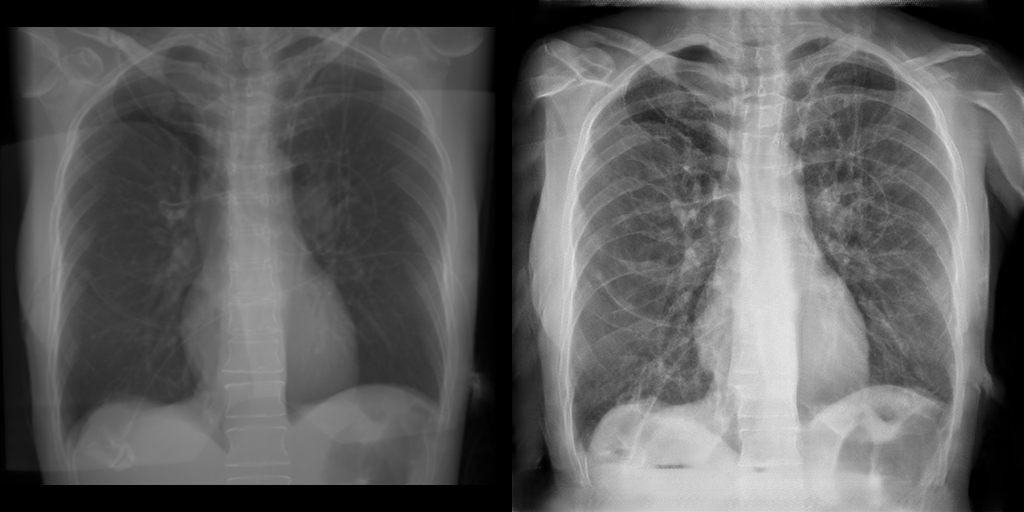

In [11]:
print(idx)
print(radchest_df["image_path"][idx].split("/")[-1])
labels_to_encode = ['Effusion', 'Pneumothorax', 'Atelectasis', 'Cardiomegaly', 'Pneumonia']
drr_image = Image.open(radchest_df["image_path"][idx])
synthex_image = Image.open(synthex_df["image_path"][idx])
print(radchest_df[labels_to_encode].iloc[idx][radchest_df[labels_to_encode].iloc[idx] == 1])


idx += 1
get_concat_h(drr_image, synthex_image)

In [6]:
import torch
import shutil
from PIL import Image

In [77]:
tensor = torch.rand(1,1,256,256)

In [79]:
tensor[0].shape

torch.Size([1, 256, 256])

In [96]:
image = keras.utils.load_img("/dtu/p1/johlau/Thesis-Synthex/synthex/pytorch_model/sample_images/synthex_1_799_rec_B.png")

In [61]:
import os

In [56]:
len(radchest_train_df)

3